In [1]:
#-*- coding:utf-8 -*-

In [1]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

C:\Users\rlawl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


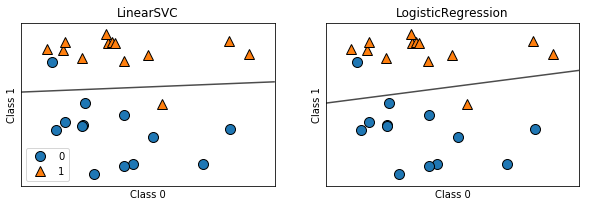

In [25]:
#-*- coding:utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Class 0")
    ax.set_ylabel("Class 1")

axes[0].legend()

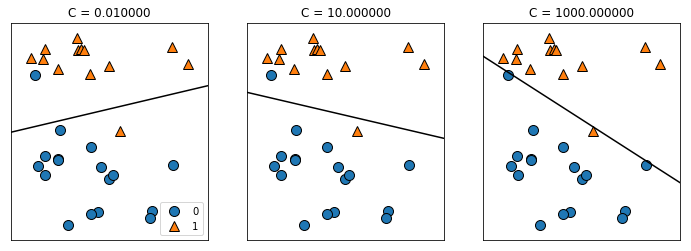

In [26]:
mglearn.plots.plot_linear_svc_regularization()
# C값이 커질수록 복잡도가 높아지지만, 시간이 오래 걸림
# C값이 클 수록 정확도가 높아짐
# C값은 10^n 값으로만 조정

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,stratify=cancer.target, random_state=42)
# C값이 1로 10^0인 모델
logreg = LogisticRegression().fit(x_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(x_test, y_test)))

훈련 세트 점수 : 0.955
테스트 세트 점수 : 0.958


In [28]:
# C값이 100으로 10^2인 모델
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(x_test, y_test)))

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965


In [29]:
# C값이 0.01로 10^-2인 모델
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(x_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# 트리의 최대 깊이를 설정하는 'max_depth'의 값을 정하지 않으면 모든 분류를 할 때까지
# 노드를 생성
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(tree.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree.score(x_test, y_test)))
# 트레이닝 데이터셋의 점수가 100%이므로 오버피팅 발생

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.937


In [31]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(x_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(tree4.score(x_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree4.score(x_test, y_test)))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.951


In [32]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.txt", class_names=["malignity", "positivity"],
               feature_names = cancer.feature_names,
               impurity=False, filled=True)

In [33]:
import graphviz

file = open('tree.txt', 'r', encoding = 'utf8')
text = file.read()

In [34]:
import pydotplus
pydotplus.find_graphviz()

In [35]:
import pydot
(graph,) = pydot.graph_from_dot_file('tree.txt', encoding='UTF-8')

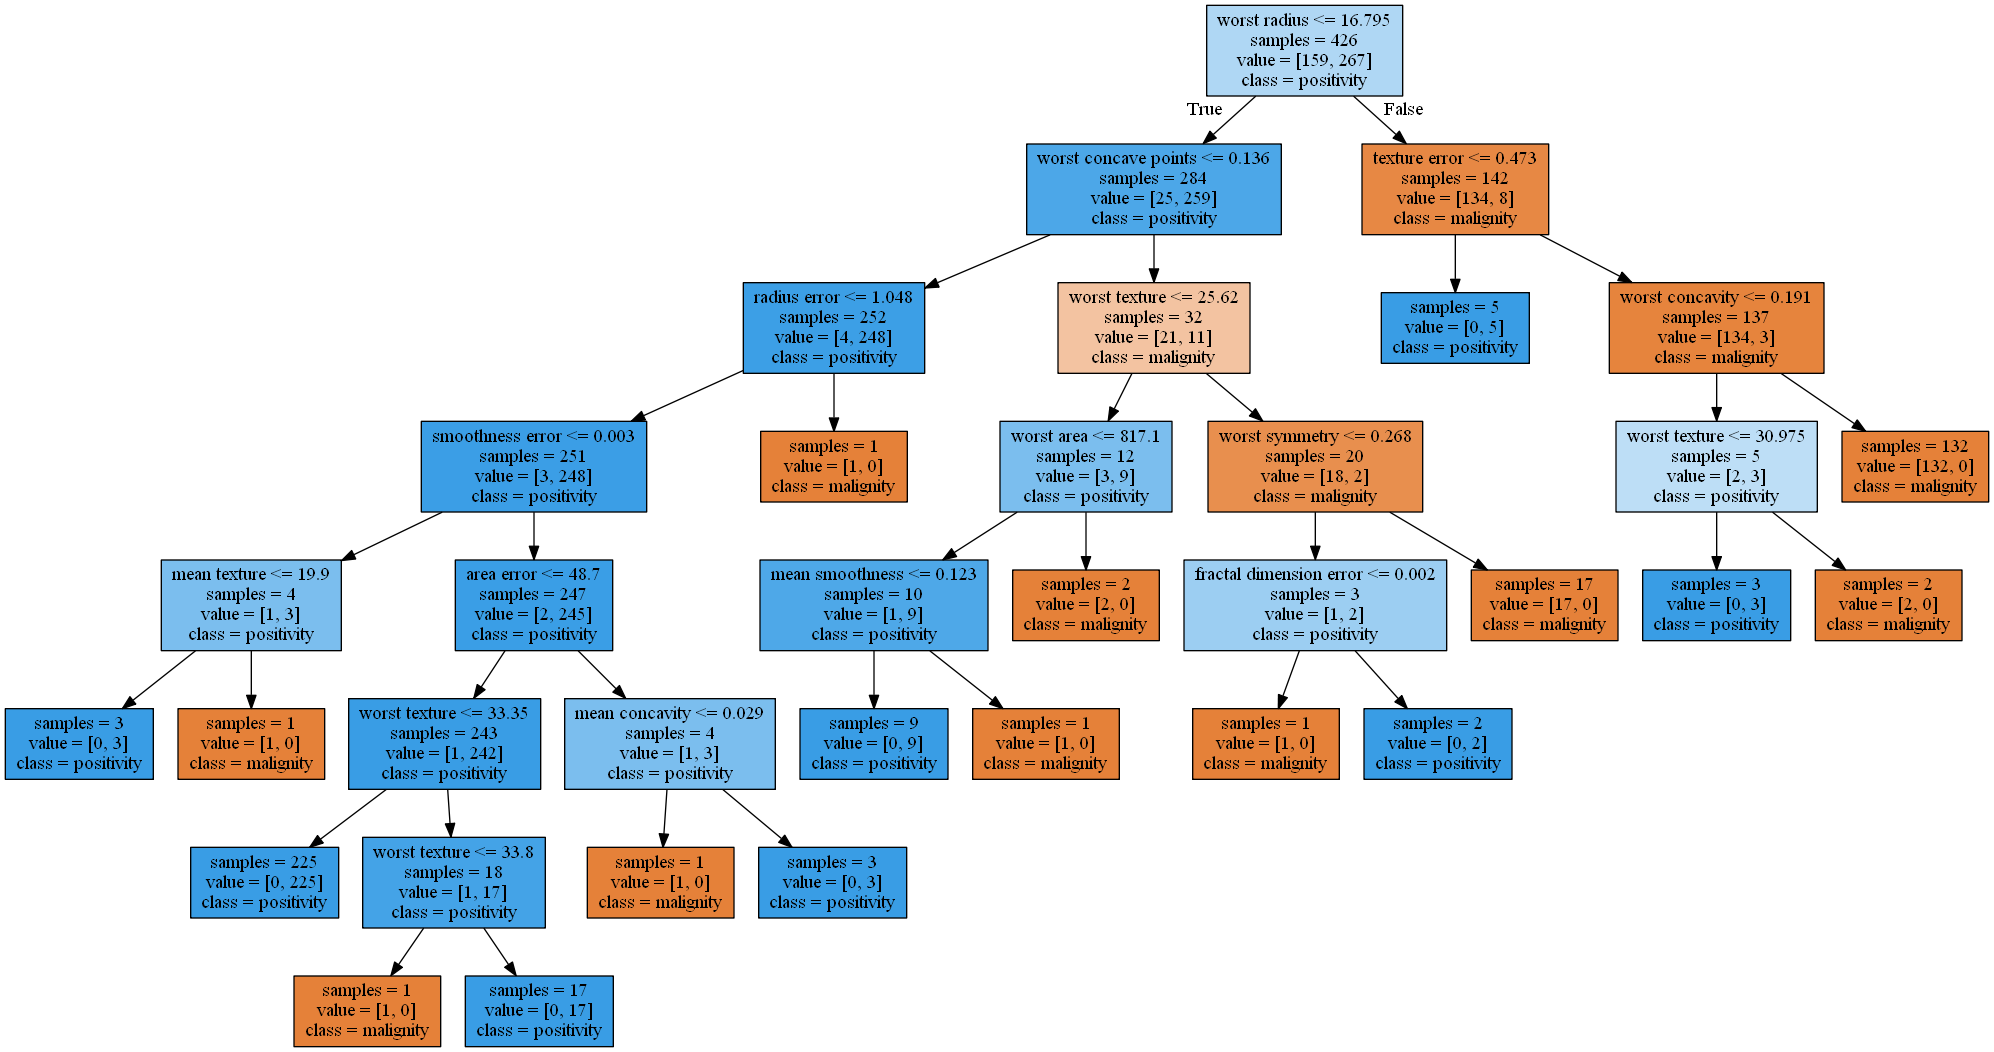

In [36]:
from IPython.display import Image
graph.write_png("tree.png")
Image(graph.create_png())

In [37]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [40]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Classifier importance")
    plt.ylabel("Classifier")
    plt.ylim(-1, n_features)

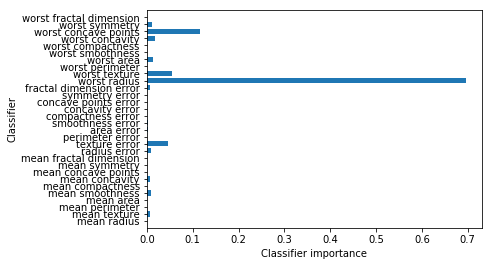

In [39]:
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


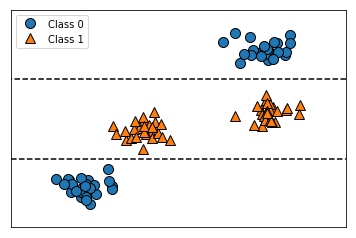

In [17]:
tree = mglearn.plots.plot_tree_not_monotone()